In [ ]:
# "Tour Guide" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.
#To predict which customer is more likely to purchase the newly introduced travel package.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Reading the data 

In [5]:
Tourism = pd.read_excel(r"C:\Users\user\Downloads\sem3\Deep Learning\oct31st assignment\Tourism.xlsx",sheet_name="Tourism")

In [6]:
Tourism

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [7]:
tourism_copy=Tourism.copy()# copying the dataframe to the variable tourism_copy

In [8]:
tourism_copy.head() 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
tourism_copy.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [10]:
tourism_copy.shape # inorder to find the shape of the data ie the number of rows and columns

(4888, 20)

In [11]:
tourism_copy.info()# to get the information of the data including the type of each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [12]:
# there is no null values in the dataset 
# fields such as type of contract,occupation,gender,ProductPitched,MaritalStatus,designation are categorical fields

In [13]:
col_object=tourism_copy.select_dtypes(['object'])# finding columns with object type
col_object.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [14]:
for i in col_object.columns:
    tourism_copy[i]=tourism_copy[i].astype('category')# converting object type into categorical one inorder to reduce memory usage

In [15]:
tourism_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [16]:
tourism_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [17]:
# minimum age of the customer is 18 and maximum age is 61 .There is missing values in the age column
#Duration of pitch is minimum 5 mins and maximum 127 minutes and mean is 15.49 minutes.there is missing values in this field
#NumberOfPersonVisiting is min 1 and max 5
#NumberOfFollowups is min 1 and max 6 .There is missing values
#Pitch Satisfaction Score is mean 3,minimum 1and maximum 5
#numberoftrips is max 22 and min 1,missing values are there
# monthly income is max 98678 ,min= 1000 and mean is 22347 

In [18]:
tourism_copy['Age'].fillna(method='ffill',inplace=True)
tourism_copy['DurationOfPitch'].fillna(method='ffill',inplace=True)
tourism_copy['NumberOfFollowups'].fillna(method='ffill',inplace=True)
tourism_copy['NumberOfTrips'].fillna(method='ffill',inplace=True)
tourism_copy['NumberOfChildrenVisiting'].fillna(method='ffill',inplace=True)
tourism_copy['MonthlyIncome'].fillna(method='ffill',inplace=True)

In [19]:
tourism_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.584697,9.297737,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.443331,8.479713,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.706628,1.000031,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.254910,1.852798,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [20]:
tourism_copy.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [21]:
tourism_copy['TypeofContact'].fillna(method='ffill',inplace=True)

In [22]:
tourism_copy.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4888,2,Self Enquiry,3462
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [23]:
tourism_copy.drop(['Occupation','Designation','OwnCar','Passport','PitchSatisfactionScore','PreferredPropertyStar'],axis=1,inplace=True)# We just these columns which may not help for the end result

In [24]:
tourism_copy

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,MaritalStatus,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Female,3,3.0,Deluxe,Single,1.0,0.0,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Male,3,4.0,Deluxe,Divorced,2.0,2.0,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Male,3,4.0,Basic,Single,7.0,0.0,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Female,2,3.0,Basic,Divorced,2.0,1.0,17909.0
4,200004,0,33.0,Self Enquiry,1,8.0,Male,2,3.0,Basic,Divorced,1.0,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Male,3,5.0,Deluxe,Unmarried,2.0,1.0,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Male,4,5.0,Basic,Single,3.0,2.0,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Female,4,4.0,Standard,Married,7.0,3.0,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Male,3,4.0,Basic,Single,3.0,2.0,20289.0


In [25]:
# to replace ProductPitched field values with 0,1,2,3,4,5
tourism_copy=tourism_copy.replace(to_replace='Basic',value=0)
tourism_copy=tourism_copy.replace(to_replace='Deluxe',value=1)
tourism_copy=tourism_copy.replace(to_replace='King',value=2)
tourism_copy=tourism_copy.replace(to_replace='Standard',value=3)
tourism_copy=tourism_copy.replace(to_replace='Super Deluxe',value=4)

In [26]:
# to replace type of contact field values with 0 and 1
tourism_copy=tourism_copy.replace(to_replace='Self Enquiry',value=0)
tourism_copy=tourism_copy.replace(to_replace='Company Invited',value=1)

In [27]:
tourism_copy.groupby(['Gender']).sum()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
Gender,,,,,,,,,,
Fe Male,31453108,25,5953.0,303,2340.0,470,609.0,578.0,201.0,3964763.0
Female,367767682,317,68984.0,3007,27939.0,5274,6712.0,5848.0,2106.0,42991851.0
Male,590323038,578,108777.0,4776,45208.0,8456,10797.0,9484.0,3502.0,68103730.0


In [28]:
# to replace gender field values with 0 and 1
tourism_copy=tourism_copy.replace(to_replace='Fe Male',value=0)
tourism_copy=tourism_copy.replace(to_replace='Female',value=1)
tourism_copy=tourism_copy.replace(to_replace='Male',value=2)

In [29]:
tourism_copy.groupby(['MaritalStatus']).sum()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
MaritalStatus,,,,,,,,,,
Divorced,191678020,124,36483.0,1594,14625.0,2785,3493.0,3110.0,1100.0,22837834.0
Married,474351350,326,89298.0,3790,36576.0,6858,8588.0,7799.0,2835.0,55549714.0
Single,185049772,304,33013.0,1461,13775.0,2447,3300.0,2706.0,925.0,20437449.0
Unmarried,138464686,166,24920.0,1241,10511.0,2110,2737.0,2295.0,949.0,16235347.0


In [30]:
# to replace marital status field values with 0,1,2,3
tourism_copy=tourism_copy.replace(to_replace='Divorced',value=0)
tourism_copy=tourism_copy.replace(to_replace='Married',value=1)
tourism_copy=tourism_copy.replace(to_replace='Single',value=2)
tourism_copy=tourism_copy.replace(to_replace='Unmarried',value=3)

In [31]:
#EDA

In [32]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=44):#to combine boxplot and histogram
   
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="blue"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  

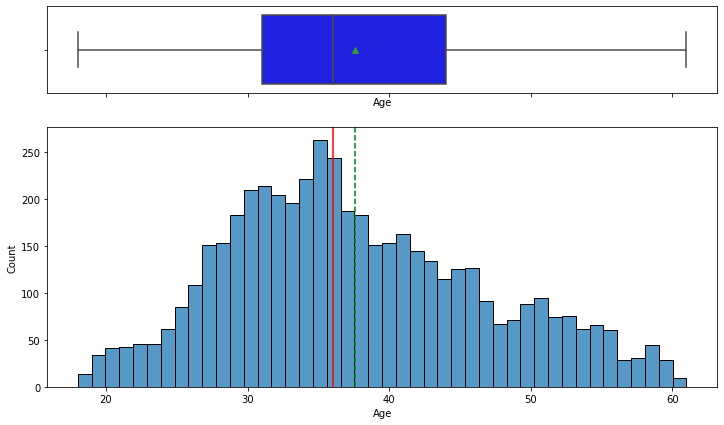

In [33]:
histogram_boxplot(tourism_copy,'Age')

In [32]:
# Age is almost distributed normally 
# It is skewed right

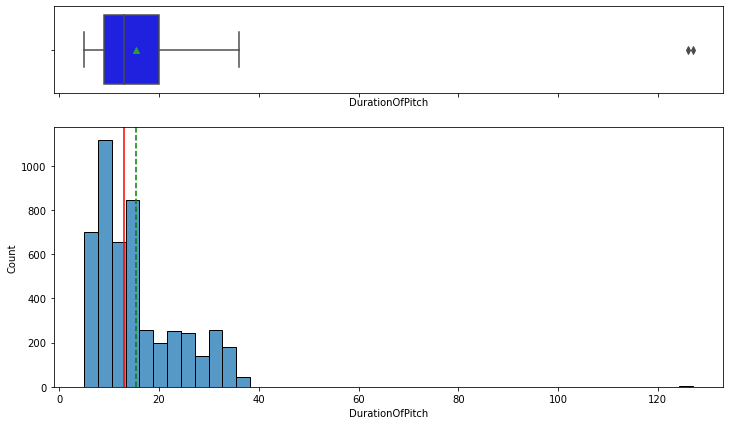

In [34]:
histogram_boxplot(tourism_copy,'DurationOfPitch')

In [34]:
# We can see some outliers
# Duration of Pitch is high for certain customer

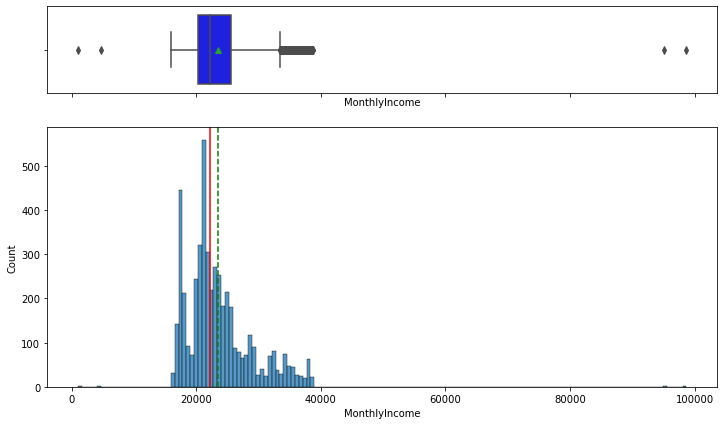

In [35]:
histogram_boxplot(tourism_copy,'MonthlyIncome')

In [36]:
#we can see outliers which means that some people has less income and some have high income

In [37]:
# for creating labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() 
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()  

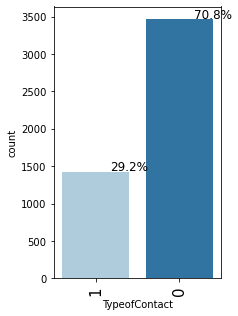

In [38]:
labeled_barplot(tourism_copy, "TypeofContact", perc=True)

In [39]:
# majority of customers are invited by company about 70 percent and only 29 percent are Self Inquiry

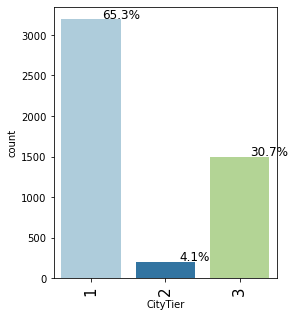

In [40]:
labeled_barplot(tourism_copy, "CityTier", perc=True)

In [41]:
# majority of customers about 65 percent from developed part and 30 percent from tier3

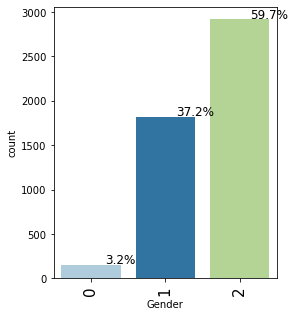

In [42]:
labeled_barplot(tourism_copy, "Gender", perc=True)

In [43]:
# Around 59.7 percent are males and 37 percent are Females

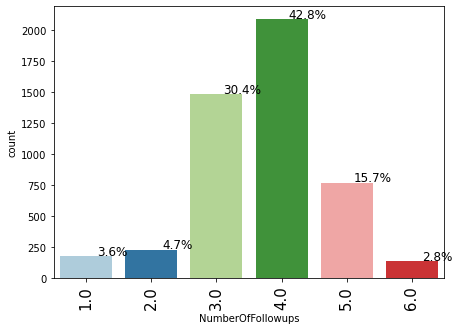

In [44]:
labeled_barplot(tourism_copy, "NumberOfFollowups", perc=True)

In [45]:
# about 42 percent customers got 4 follows and 30 percent got 3 followups

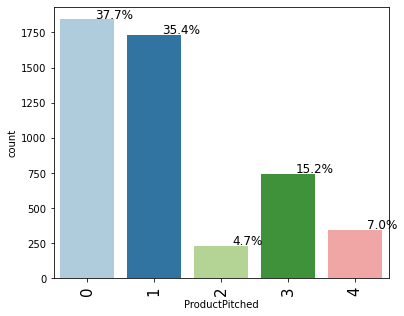

In [46]:
labeled_barplot(tourism_copy, "ProductPitched", perc=True)

In [47]:
# about 37 pecent people took basic and 35 percent took standard

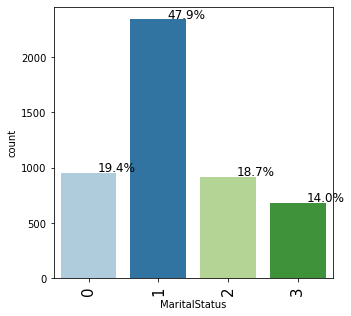

In [48]:
labeled_barplot(tourism_copy, "MaritalStatus", perc=True)

In [49]:
# married people are about 47 percent and it is the highest and rest are almost equal

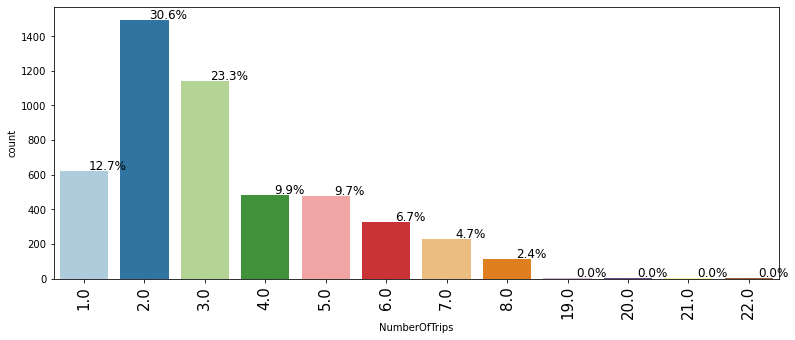

In [50]:
labeled_barplot(tourism_copy, "NumberOfTrips", perc=True)

In [51]:
# majority of customers ie 30 percent done 2 trips and 22.1 percent done 3 trips

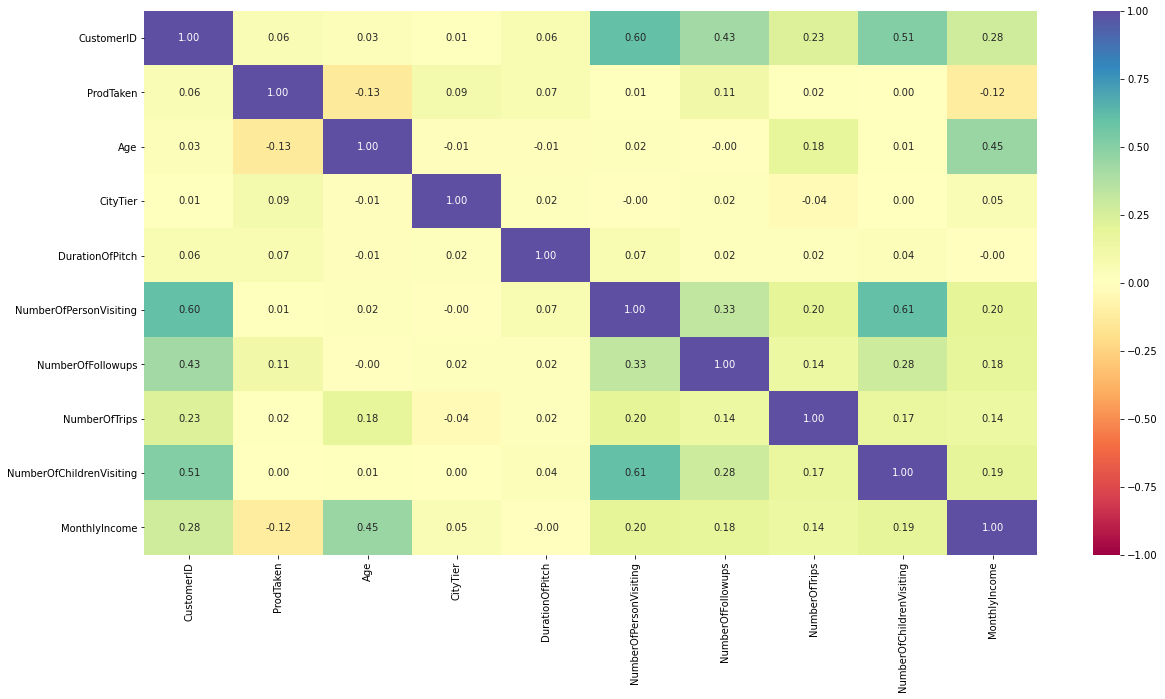

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(tourism_copy.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

In [53]:
# monthlyincome is highly correlated with age
# numberofchildrenvisiting is highly correlated with numberofpersonvisiting ie majority is family
# NoofPersonVisiting is correlated with NumberofFollowups

In [54]:
# function for creating stacked bar chart


def stacked_barplot(data, predictor, target):
    
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken         0    1   All
TypeofContact                 
All            3968  920  4888
0              2852  610  3462
1              1116  310  1426
------------------------------------------------------------------------------------------------------------------------


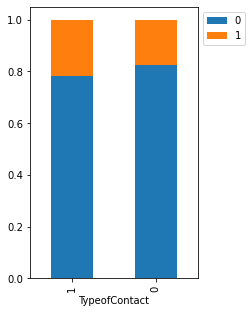

In [55]:
stacked_barplot(tourism_copy, "TypeofContact", "ProdTaken")

In [56]:
# self inquiry people taken the product that company contact.However there is not much difference

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4.0                1708  383  2091
3.0                1238  248  1486
5.0                 578  191   769
6.0                  82   54   136
2.0                 205   24   229
1.0                 157   20   177
------------------------------------------------------------------------------------------------------------------------


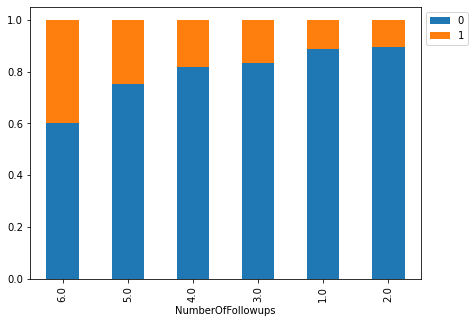

In [57]:
stacked_barplot(tourism_copy, "NumberOfFollowups", "ProdTaken")

In [58]:
# as number of followup increases the chance of taking product is high

ProdTaken           0    1   All
DurationOfPitch                 
All              3968  920  4888
9.0               410   81   491
8.0               296   69   365
16.0              237   56   293
15.0              229   55   284
7.0               296   50   346
10.0              211   50   261
6.0               299   48   347
14.0              227   42   269
11.0              170   37   207
12.0              174   35   209
13.0              205   32   237
30.0               67   32    99
31.0               52   31    83
17.0              151   24   175
23.0               64   23    87
22.0               66   23    89
19.0               36   22    58
29.0               56   22    78
18.0               60   21    81
20.0               46   20    66
28.0               44   18    62
21.0               59   17    76
24.0               61   17    78
32.0               59   15    74
27.0               66   14    80
25.0               61   14    75
26.0               75   12    87
33.0      

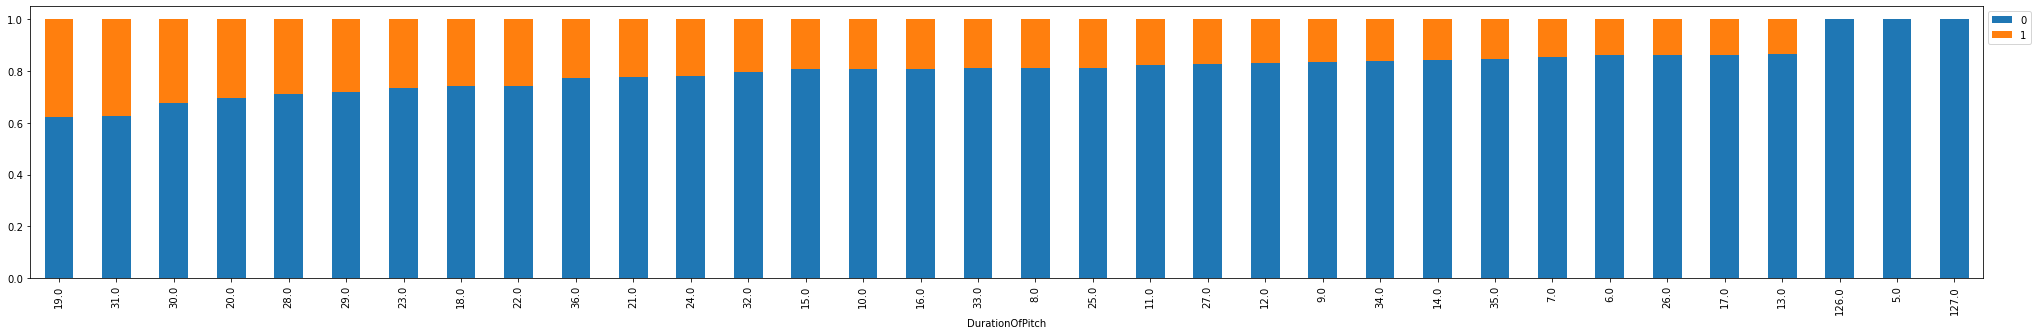

In [59]:
stacked_barplot(tourism_copy, "DurationOfPitch", "ProdTaken")

In [60]:
# as duration of pitch increases the chance of taking product is high

In [61]:
tourism_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  MaritalStatus             4888 non-null   category
 11  NumberOfTrips             4888 non-null   float64 
 12  NumberOfChildrenVisiting  4888 non-null   float64 
 13  MonthlyIncome             4888 non-null   float6

In [62]:
#Model-Random forest Classifier

In [63]:
X = tourism_copy.drop(['ProdTaken'],axis=1)
y = tourism_copy['ProdTaken']

In [64]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

(3421, 13) (1467, 13)


In [65]:
classifier=RandomForestClassifier(n_estimators=200,random_state=0)

classifier.fit(X_train,y_train)#fitting the model


RandomForestClassifier(n_estimators=200, random_state=0)

In [66]:
y_pred=classifier.predict(X_test)#predicting the model

In [67]:

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1190    5]
 [ 182   90]]


Text(33.0, 0.5, 'Actual Values')

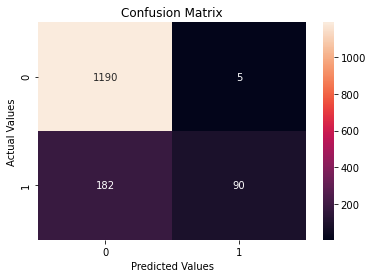

In [68]:
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [69]:
#ProdTaken by the customer based on this matrix is 148: True Positive (observed=1,predicted=1)

#Package is not taken but predicted that the customer will take is 124 : False Positive (observed=0,predicted=1)

#Package is not taken in actual and predicted based on this matrix is 1071 : True Negative (observed=0,predicted=0)

#Package is  taken actually but predicted that the customer will take is 124: False Negative (observed=1,predicted=0)

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1195
           1       0.95      0.33      0.49       272

    accuracy                           0.87      1467
   macro avg       0.91      0.66      0.71      1467
weighted avg       0.88      0.87      0.85      1467



In [71]:
# Decision Tree Classifier

In [72]:
clf = DecisionTreeClassifier(criterion='gini',random_state=1)

In [73]:
clf = clf.fit(X_train,y_train)#fitting the model

In [74]:
y_pred_d = clf.predict(X_test)#predicting the model

In [75]:
labels = ['0','1']
cmd = confusion_matrix(y_test,y_pred_d)
print(cmd)

[[1071  124]
 [ 124  148]]


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1195
           1       0.54      0.54      0.54       272

    accuracy                           0.83      1467
   macro avg       0.72      0.72      0.72      1467
weighted avg       0.83      0.83      0.83      1467



Text(33.0, 0.5, 'Actual Values')

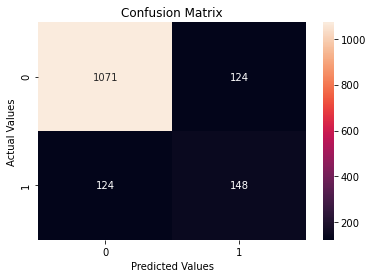

In [77]:
sns.heatmap(cmd,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [78]:
#ProdTaken by the customer based on this matrix is 148: True Positive (observed=1,predicted=1)

#Package is not taken but predicted that the customer will take is 124 : False Positive (observed=0,predicted=1)

#Package is not taken in actual and predicted based on this matrix is 1071 : True Negative (observed=0,predicted=0)

#Package is  taken actually but predicted that the customer will take is 124: False Negative (observed=1,predicted=0)

In [79]:
#logistic Regression

In [80]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [81]:
model=LogisticRegression()
model.fit(X_train,y_train)# fiting the model 

LogisticRegression()

In [82]:
y_predict=model.predict(X_test)#predicting the model
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
labels = ['0','1']
cml = confusion_matrix(y_test,y_pred)
print(cml)

[[1190    5]
 [ 182   90]]


Text(33.0, 0.5, 'Actual Values')

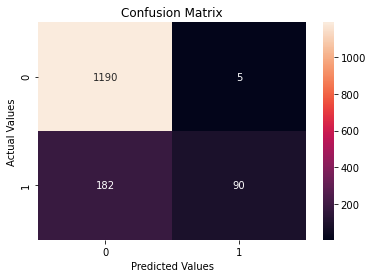

In [84]:
sns.heatmap(cml,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [85]:
#ProdTaken by the customer based on this matrix is 148: True Positive (observed=1,predicted=1)

#Package is not taken but predicted that the customer will take is 124 : False Positive (observed=0,predicted=1)

#Package is not taken in actual and predicted based on this matrix is 1071 : True Negative (observed=0,predicted=0)

#Package is  taken actually but predicted that the customer will take is 124: False Negative (observed=1,predicted=0)

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1195
           1       0.95      0.33      0.49       272

    accuracy                           0.87      1467
   macro avg       0.91      0.66      0.71      1467
weighted avg       0.88      0.87      0.85      1467

